# Используемые библиотеки

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Раздел функций

In [2]:
def generator(k, b, points_num, percent):
  inline = [[x, k*x+b+np.random.normal()] for x in np.random.uniform(0, 10, size=int(points_num*percent))]
  outline = [[x, k*x+b+np.random.normal(scale=10)] for x in np.random.uniform(0, 10, size=int(points_num*(1 - percent)))]
  return np.vstack([inline, outline])

In [3]:
def ransac(data, iter=100, eps=0.1, inlinear_min=10):
  best_score = np.inf
  for i in range(iter):
    indexes = np.random.choice(data.shape[0], 2, replace=False)
    p1, p2 = data[indexes, :]

    k = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - k * p1[0]
    
    inlinears = []
    error = 0

    for p in np.delete(data, indexes, axis=0):
      d = np.linalg.norm(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)
      if d < eps:
        inlinears.append(p)
        error += d  

    if len(inlinears) < inlinear_min:
      continue

    if error < best_score:
      best_score = error
      best_params = k, b
      best_inlinears = inlinears

  return best_score, best_params, best_inlinears

  error = np.sqrt(np.power(p1[0] - p1[0], 2) + np.power(p1[1] - k*p1[0] + b, 2))

# Основное тело программы

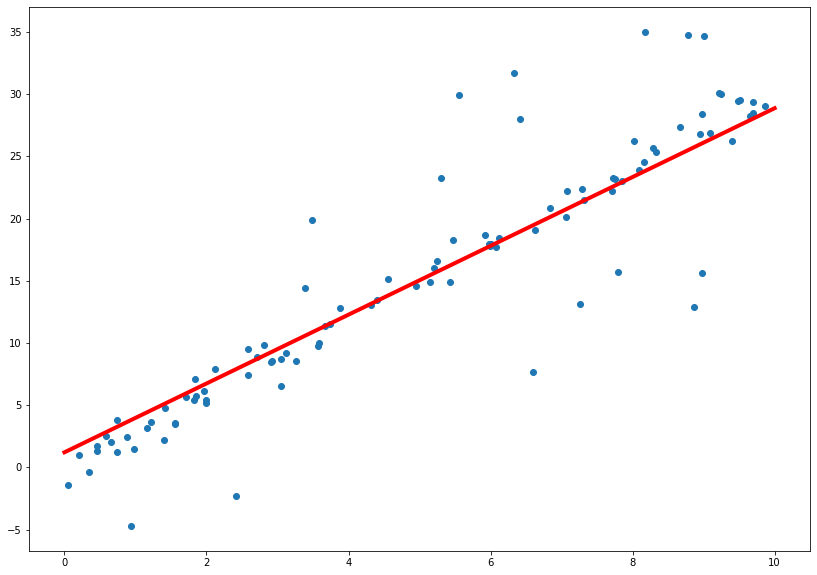

In [5]:
np.random.seed(42)

lin = np.linspace(0, 10, 100)
data = generator(3, 0, 100, 0.8)

score, params, inlinears = ransac(data)

plt.figure(figsize=(14,10))
plt.scatter(data[:,0], data[:, 1])
plt.plot(lin, params[0]*lin + params[1], color='r', linewidth=4)
plt.show()